# EDA on Contributions Data

## Load data

In [1]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/M.L. Final Project/Data/Raw Data/Lobbyist_Data_-_Contributions (1).csv", index_col="CONTRIBUTION_ID")

In [2]:
data.head()

,PERIOD_START,PERIOD_END,CONTRIBUTION_DATE,RECIPIENT,AMOUNT,LOBBYIST_ID,LOBBYIST_FIRST_NAME,LOBBYIST_LAST_NAME,CREATED_DATE
CONTRIBUTION_ID,,,,,,,,,
2240204276,07/01/2020,09/30/2020,08/24/2020,ALDERMAN MARIA HADDEN,250.0,23981,ALEXANDRA,SIMS,12/01/2020
16680854,04/01/2020,06/30/2020,06/10/2020,24TH WARD ORGANIZATION - ALD. MICHAEL SCOTT,500.0,16501,REYAHD,KAZMI,12/10/2020
146026078,01/01/2020,03/31/2020,02/18/2020,ALD. GILBERT VILLEGAS,150.0,16501,REYAHD,KAZMI,12/10/2020
2237026963,10/01/2020,12/31/2020,12/18/2020,NaN,0.0,24286,TOM,FEENEY,12/18/2020
279679753,10/01/2020,12/31/2020,12/18/2020,N?A,0.0,24286,TOM,FEENEY,12/18/2020


## Column info

In [3]:
data.columns

Index(['PERIOD_START', 'PERIOD_END', 'CONTRIBUTION_DATE', 'RECIPIENT',
       'AMOUNT', 'LOBBYIST_ID', 'LOBBYIST_FIRST_NAME', 'LOBBYIST_LAST_NAME',
       'CREATED_DATE'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5362 entries, 2240204276 to 2753220905
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PERIOD_START         5362 non-null   object 
 1   PERIOD_END           5362 non-null   object 
 2   CONTRIBUTION_DATE    5362 non-null   object 
 3   RECIPIENT            5294 non-null   object 
 4   AMOUNT               5362 non-null   float64
 5   LOBBYIST_ID          5362 non-null   int64  
 6   LOBBYIST_FIRST_NAME  5362 non-null   object 
 7   LOBBYIST_LAST_NAME   5362 non-null   object 
 8   CREATED_DATE         5362 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 418.9+ KB


In [5]:
data['PERIOD_START'] = pd.to_datetime(data['PERIOD_START'])
data['PERIOD_END'] = pd.to_datetime(data['PERIOD_END'])
data['CREATED_DATE'] = pd.to_datetime(data['CREATED_DATE'])

In [6]:
data.describe()

,AMOUNT,LOBBYIST_ID
count,5362.000000,5362.000000
mean,508.705201,7111.667848
std,427.300971,5521.355678
min,0.000000,3734.000000
25%,250.000000,3931.000000
50%,500.000000,4162.000000
75%,500.000000,8161.000000
max,5300.000000,25128.000000


## Data Vis

In [7]:
%matplotlib inline
import seaborn as sns
sns.set_theme()

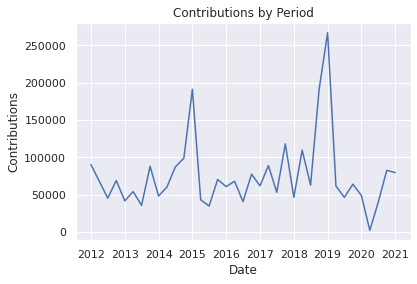

In [8]:
graph_data = data.groupby('PERIOD_START')['AMOUNT'].sum()

g = sns.lineplot(x = graph_data.index, y = graph_data)
g = g.set(title = "Contributions by Period", xlabel = "Date", ylabel = "Contributions")

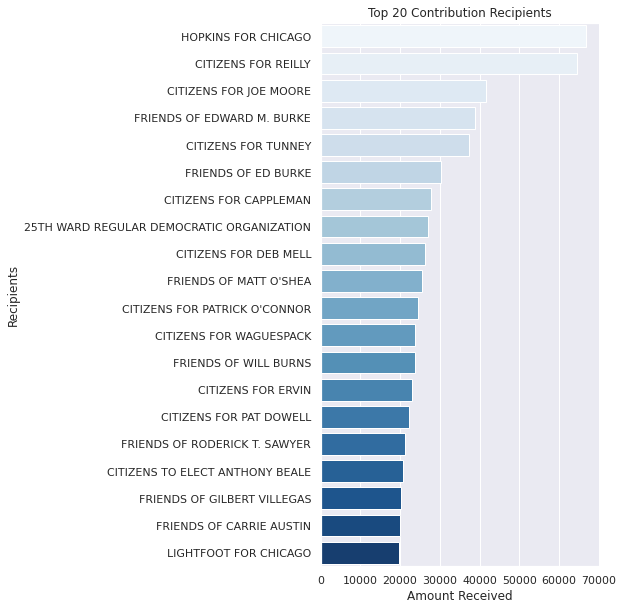

In [13]:
graph_data = data.groupby('RECIPIENT')['AMOUNT'].sum().sort_values(ascending = False)[0:20]

sns.set(rc={'figure.figsize':(5, 10)})
g = sns.barplot(y = graph_data.index, x = graph_data, palette="Blues")
g = g.set(title = "Top 20 Contribution Recipients", xlabel = "Amount Received", ylabel = "Recipients")

## Adding in Ward Data

In [ ]:
wards = pd.read_csv('/content/drive/MyDrive/M.L. Final Project/Data/Raw Data/Ward_Offices.csv')
wards['Last Name'] = wards['ALDERMAN'].str.split(',', expand = True)[0]
wards.head()

,WARD,ALDERMAN,ADDRESS,CITY,STATE,ZIPCODE,WARD PHONE,WARD FAX,EMAIL,WEBSITE,LOCATION,CITY HALL ADDRESS,CITY HALL CITY,CITY HALL STATE,CITY HALL ZIPCODE,CITY HALL PHONE,Last Name
0,33,"Rodriguez Sanchez, Rossana",3001 West Irving Park Road,Chicago,IL,60618.0,(773) 840-7880,NaN,Info@33rdward.org,NaN,"(41.95392, -87.703301)","121 North LaSalle Street, Room 200, Office 20",Chicago,IL,60602,(312) 744-3373,Rodriguez Sanchez
1,17,"Moore, David H.",1344 West 79th Street,Chicago,IL,60636.0,(773) 783-3672,(773) 783-3878,Alderman@17ward.com,http://www.David.Moore@cityofchicago.org,"(41.75044, -87.657221)","121 North LaSalle Street, Room 300, Office 37",Chicago,IL,60602,(312) 744-3435,Moore
2,44,"Tunney, Thomas","3223 North Sheffield Avenue, Suite A",Chicago,IL,60657.0,(773) 525-6034,(773) 525-5058,Ward44@cityofchicago.org,http://44thward.org/,"(41.940497, -87.654108)","121 North LaSalle Street, Room 304",Chicago,IL,60602,(312) 744-3073 / 3133,Tunney
3,37,"Mitts, Emma",5344 West North Avenue,Chicago,IL,60651.0,(773) 379-0960,(773) 773-0966,Ward37@cityofchicago.org,https://www.cityofchicago.org/city/en/about/wa...,"(41.909514, -87.759726)","121 North LaSalle Street, Room 300, Office 45",Chicago,IL,60602,(312) 744-3180 / 1589,Mitts
4,4,"King, Sophia D.",435 East 35th Street,Chicago,IL,60616.0,(773) 536-8103,773-536-7296,Ward04@cityofchicago.org,http://www.aldsophiaking.com,"(41.831135, -87.61541)","121 North LaSalle Street, Room 300, Office 29",Chicago,IL,60602,(312) 744-2690,King


In [ ]:
data['Ward'] = 0
# Loop through each contribution recipient to identify a matching ward number
for i in range(0,len(data)):
    #Try/Catch to avoid the nulls in the recipients column
    try:
        recipient = data.iloc[i,3].lower()        
        # Loop through each ward to see if an alderman's last name matches a word in the recipients column
        for j in range(0, len(wards)):
            ward = wards.iloc[j, 16].lower()
            if ward in recipient:
                # If there's a match, update the ward column
                data.iloc[i,9] = wards.iloc[j, 0]
    except:
        pass

data.head()

,PERIOD_START,PERIOD_END,CONTRIBUTION_DATE,RECIPIENT,AMOUNT,LOBBYIST_ID,LOBBYIST_FIRST_NAME,LOBBYIST_LAST_NAME,CREATED_DATE,Ward
CONTRIBUTION_ID,,,,,,,,,,
2240204276,2020-07-01,2020-09-30,08/24/2020,ALDERMAN MARIA HADDEN,250.0,23981,ALEXANDRA,SIMS,2020-12-01,49
16680854,2020-04-01,2020-06-30,06/10/2020,24TH WARD ORGANIZATION - ALD. MICHAEL SCOTT,500.0,16501,REYAHD,KAZMI,2020-12-10,24
146026078,2020-01-01,2020-03-31,02/18/2020,ALD. GILBERT VILLEGAS,150.0,16501,REYAHD,KAZMI,2020-12-10,36
2237026963,2020-10-01,2020-12-31,12/18/2020,NaN,0.0,24286,TOM,FEENEY,2020-12-18,0
279679753,2020-10-01,2020-12-31,12/18/2020,N?A,0.0,24286,TOM,FEENEY,2020-12-18,0


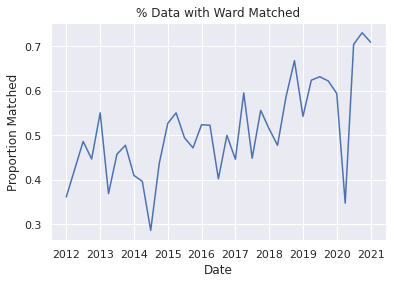

In [ ]:
data['Ward_filled'] = pd.Series(data['Ward'] != 0)
graph_data = data.groupby('PERIOD_START')['Ward_filled'].mean()

g = sns.lineplot(x = graph_data.index, y = graph_data)
g = g.set(title = "% Data with Ward Matched", xlabel = "Date", ylabel = "Proportion Matched")

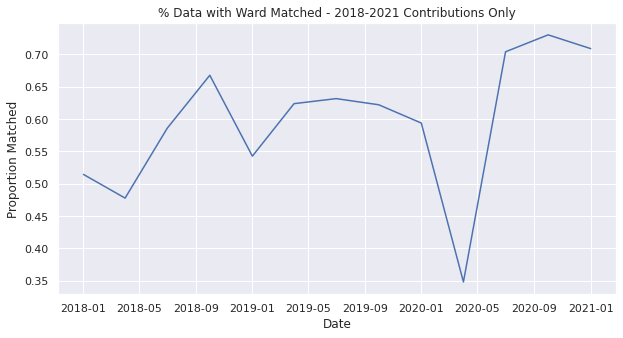

In [ ]:
data['Ward_filled'] = pd.Series(data['Ward'] != 0)
graph_data = data[data["PERIOD_START"].dt.year >= 2018].groupby('PERIOD_START')['Ward_filled'].mean()
sns.set(rc={'figure.figsize':(10, 5)})

g = sns.lineplot(x = graph_data.index, y = graph_data)
g = g.set(title = "% Data with Ward Matched - 2018-2021 Contributions Only", xlabel = "Date", ylabel = "Proportion Matched")

In [ ]:
data.head()

,PERIOD_START,PERIOD_END,CONTRIBUTION_DATE,RECIPIENT,AMOUNT,LOBBYIST_ID,LOBBYIST_FIRST_NAME,LOBBYIST_LAST_NAME,CREATED_DATE,Ward,Ward_filled
CONTRIBUTION_ID,,,,,,,,,,,
2240204276,2020-07-01,2020-09-30,08/24/2020,ALDERMAN MARIA HADDEN,250.0,23981,ALEXANDRA,SIMS,2020-12-01,49,True
16680854,2020-04-01,2020-06-30,06/10/2020,24TH WARD ORGANIZATION - ALD. MICHAEL SCOTT,500.0,16501,REYAHD,KAZMI,2020-12-10,24,True
146026078,2020-01-01,2020-03-31,02/18/2020,ALD. GILBERT VILLEGAS,150.0,16501,REYAHD,KAZMI,2020-12-10,36,True
2237026963,2020-10-01,2020-12-31,12/18/2020,NaN,0.0,24286,TOM,FEENEY,2020-12-18,0,False
279679753,2020-10-01,2020-12-31,12/18/2020,N?A,0.0,24286,TOM,FEENEY,2020-12-18,0,False
